## 頂点ラベル付きグラフの描画とファイル出力

In [9]:
import colorsys
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


from matplotlib.backends.backend_pdf import PdfPages

# 配列を初期化
color_array = []

# 頂点ラベル数
sigma = 5

# CSS4_COLORS の色をリストに変換
colors = list(mcolors.CSS4_COLORS.values())

# 色を均等に選ぶためのインターバルを計算
interval = len(colors) // sigma

# インターバルに従って均等に色を選択
for i in range(sigma):
    color_array.append(colors[i * interval])

# # 指定したサイズの色情報を生成
# for _ in range(sigma):
#     # ランダムな色情報を生成
#     random_color = random.choice(list(mcolors.CSS4_COLORS.values()))
#     color_array.append(random_color)

# 生成した色情報を表示
print("Color Array:", color_array)


Color Array: ['#F0F8FF', '#556B2F', '#FF69B4', '#66CDAA', '#DDA0DD']


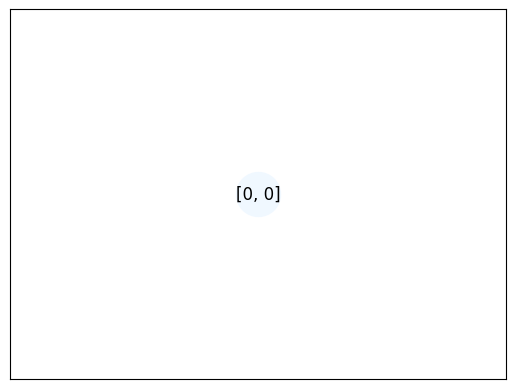

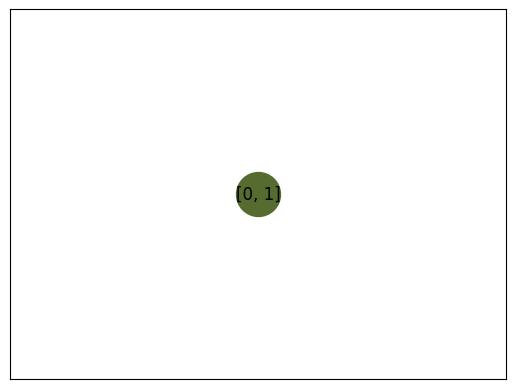

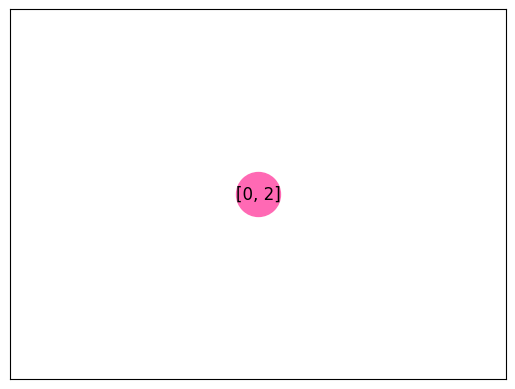

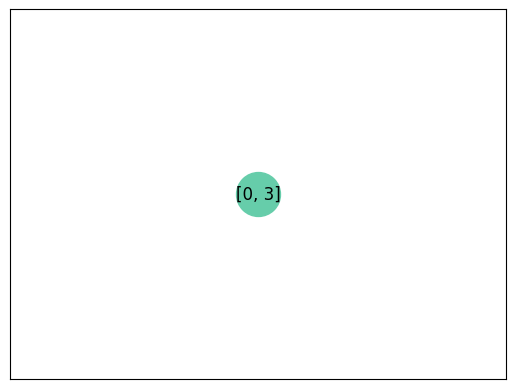

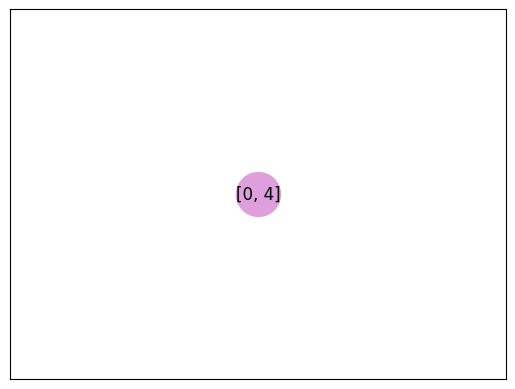

In [10]:
import colorsys
import random
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors


from matplotlib.backends.backend_pdf import PdfPages


pdf = PdfPages("output.pdf")

# ファイルを読み込む
with open("output.gfu", "r") as f:
    data = f.readlines()
    
data_len = len(data)

now = 0


while True:
# 頂点数を取得   
    now +=1
    labels = None
    n = int(data[now])
    
    # 頂点IDを取得
    nodes = [int(x) for x in data[now+1:now+1+n]]

    # グラフを初期化
    G = nx.Graph()
    
    id = 0
    countlabels = set()
    max_label = 0

    # 頂点をグラフに追加
    for node in nodes:
        # print(node)
        # G.nodes[id] = node
        G.add_node(id)
        if id==0:
            labels = {id: [id,node]}
        else:
            labels[id] = id,node
        id+=1

        # countlabels.add(node)
        if max_label < node:
            max_label = node
    
    
    # 辺の数を取得
    m = int(data[now+n+1])
    
    # 辺をグラフに追加
    for line in data[now+n+2:now+n+2+m]:
        u, v = map(int, line.split())
        G.add_edge(u, v)
        
    now+=n+2+m
    
    fig, ax = plt.subplots()  # 図のサイズを調整


  # force-directed layoutアルゴリズムを使用してノードの位置を計算
    pos = nx.spring_layout(G)
    nx.draw_networkx_nodes(G, pos,node_size=1000,node_color=[color_array[node] for node in nodes])
    # nx.draw_networkx_nodes(G, pos,node_size=1000)

    nx.draw_networkx_edges(G, pos)
    nx.draw_networkx_labels(G, pos, labels, font_size=12,font_color='black')
    
    plt.show()
    
    plt.close()   # Figureオブジェクトを閉じる
    pdf.savefig(fig)
        
    if now>=data_len:
        break
    
pdf.close()
